In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from kneed import KneeLocator


dataset = pd.read_csv("Wuzzuf_Jobs.csv")

dataset['Title'] = pd.factorize(dataset['Title'])[0]
dataset['Compasny'] = pd.factorize(dataset['Company'])[0]

X = dataset.iloc[:, [0, 1]].values
print(X)



[[   0    0]
 [   1    1]
 [   2    2]
 ...
 [2963 1533]
 [2048  133]
 [2964 1533]]


5


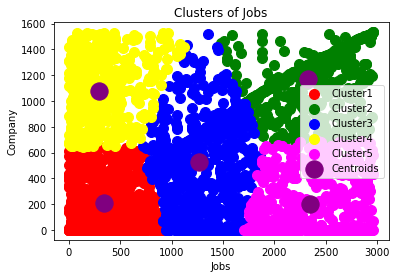

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
k = KneeLocator(range(1, 30), wcss, curve="convex", direction="decreasing")
print(k.elbow)

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=k.elbow, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans == 0

# Visualising the clusters
for i in range(k.elbow):
    color = ['red', 'green','blue', 'yellow', 'magenta',  'black','marron', 'pink','gold']
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=color[i], label=f'Cluster{i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='purple', label='Centroids')
plt.title('Clusters of Jobs')
plt.xlabel('Jobs')
plt.ylabel('Company')
plt.legend()
plt.show()